In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
# Generate synthetic data with different feature scales
np.random.seed(0)

# Daily temperature (feature x1) with a range of [20, 40] degrees Celsius
temperature = 20 + 20 * np.random.rand(100, 1)

# Ice cream sales (feature x2) with a range of [0, 200] units
ice_cream_sales = 200 * np.random.rand(100, 1)

# Combine temperature and ice cream sales into a single feature matrix X
X = np.hstack((temperature, ice_cream_sales))


In [13]:
# Daily profit (target variable y)
# Assume that daily profit depends on the temperature, ice cream sales,
# and some random noise (normal distribution)
daily_profit = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)

# Function to scale features using max-min scaling
def max_min_scaling(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_scaled = (X - min_vals) / (max_vals - min_vals)
    return X_scaled

In [14]:
# Function to scale features using mean normalization
def mean_normalization(X):
    mean_vals = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean_vals) / std_dev
    return X_scaled


In [15]:
# Function to scale features using Z-score scaling
def z_score_scaling(X):
    mean_vals = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean_vals) / std_dev
    return X_scaled


In [16]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, daily_profit, test_size=0.2, random_state=42)

# Scale the features using three different methods
X_train_max_min = max_min_scaling(X_train)
X_train_mean_norm = mean_normalization(X_train)
X_train_z_score = z_score_scaling(X_train)


In [18]:
# Perform linear regression with gradient descent for each scaled feature set

def linear_regression_gradient_descent(X_train_scaled, y_train, num_iterations=1000, learning_rate=0.01):
    m, n = X_train_scaled.shape
    w = np.zeros((n, 1))
    b = 0

    for iteration in range(num_iterations):
        y_pred = np.dot(X_train_scaled, w) + b
        w_gradient = (1 / m) * np.dot(X_train_scaled.T, (y_pred - y_train))
        b_gradient = (1 / m) * np.sum(y_pred - y_train)
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

    return w, b


In [19]:
w_max_min, b_max_min = linear_regression_gradient_descent(X_train_max_min, y_train)
w_mean_norm, b_mean_norm = linear_regression_gradient_descent(X_train_mean_norm, y_train)
w_z_score, b_z_score = linear_regression_gradient_descent(X_train_z_score, y_train)

# Evaluate the models on the test data and calculate MSE
X_test_max_min = max_min_scaling(X_test)
X_test_mean_norm = mean_normalization(X_test)
X_test_z_score = z_score_scaling(X_test)

y_pred_max_min = np.dot(X_test_max_min, w_max_min) + b_max_min
y_pred_mean_norm = np.dot(X_test_mean_norm, w_mean_norm) + b_mean_norm
y_pred_z_score = np.dot(X_test_z_score, w_z_score) + b_z_score

mse_max_min = calculate_mse(y_test, y_pred_max_min)
mse_mean_norm = calculate_mse(y_test, y_pred_mean_norm)
mse_z_score = calculate_mse(y_test, y_pred_z_score)

# Print the MSE results for each scaling method
print("MSE (Max-Min Scaling):", mse_max_min)
print("MSE (Mean Normalization):", mse_mean_norm)
print("MSE (Z-Score Scaling):", mse_z_score)


MSE (Max-Min Scaling): 1422.8158514676393
MSE (Mean Normalization): 3329.974466558134
MSE (Z-Score Scaling): 3329.974466558134


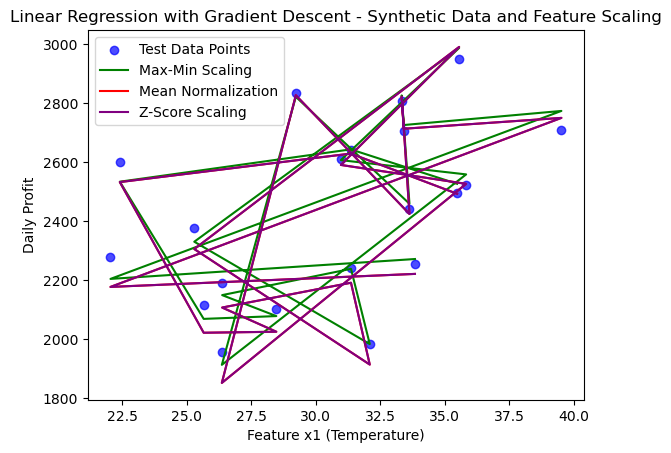

In [20]:
# Plot one feature (e.g., x1) against y_test
plt.scatter(X_test[:, 0], y_test, label='Test Data Points', alpha=0.7, c='blue')
plt.plot(X_test[:, 0], y_pred_max_min, label='Max-Min Scaling', c='green')
plt.plot(X_test[:, 0], y_pred_mean_norm, label='Mean Normalization', c='red')
plt.plot(X_test[:, 0], y_pred_z_score, label='Z-Score Scaling', c='purple')

plt.xlabel('Feature x1 (Temperature)')
plt.ylabel('Daily Profit')
plt.legend()
plt.title('Linear Regression with Gradient Descent - Synthetic Data and Feature Scaling')
plt.show()